In [ ]:
!pip install labelme tensorflow tensorflow-gpu opencv-python matplotlib albumentations

In [ ]:
!pip install opencv-python

In [10]:
!pip install labelme

  Using cached labelme-5.1.1.tar.gz (1.5 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached imgviz-1.6.2-py3-none-any.whl
  Using cached natsort-8.2.0-py3-none-any.whl (37 kB)
  Using cached termcolor-2.1.1-py3-none-any.whl (6.2 kB)
  Created wheel for labelme: filename=labelme-5.1.1-py3-none-any.whl size=1466349 sha256=777b88058995aeddfa7a839a015abb266839f4353a2e6a4b2bc378e5255a4247
  Stored in directory: c:\users\dhivy\appdata\local\pip\cache\wheels\f7\dd\4b\aa34a2cc4e9a53f43b682ee3e74ab03e877f37cc36c67ea099
Successfully built labelme


In [6]:
import os
import time
import uuid
import cv2

In [7]:
IMAGES_PATH = os.path.join("data", "images")
number_images = 30

In [28]:
vid = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = vid.read()
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
vid.release()
cv2.destroyAllWindows()

In [61]:
!labelme

^C


In [8]:
import numpy as np
import tensorflow as tf
import json
from matplotlib import pyplot as plt

In [9]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [10]:
tf.config.list_physical_devices('GPU')

[]

In [11]:
images = tf.data.Dataset.list_files('data\\images\\*.jpg')

In [12]:
images.as_numpy_iterator().next()

b'data\\images\\fae672aa-7064-11ed-be71-00155dc7c39b.jpg'

In [13]:
def load_image(img): 
    byte_image = tf.io.read_file(img)
    image = tf.io.decode_jpeg(byte_image)
    return image

In [14]:
images = images.map(load_image)

In [15]:
images.as_numpy_iterator().next()

array([[[21, 26, 19],
        [21, 26, 19],
        [22, 27, 21],
        ...,
        [23, 25, 20],
        [23, 25, 20],
        [23, 25, 20]],

       [[21, 26, 19],
        [21, 26, 19],
        [21, 26, 20],
        ...,
        [23, 25, 20],
        [23, 25, 20],
        [22, 24, 19]],

       [[20, 25, 18],
        [21, 26, 19],
        [21, 26, 19],
        ...,
        [23, 25, 20],
        [22, 24, 19],
        [22, 24, 19]],

       ...,

       [[21, 24, 15],
        [21, 24, 15],
        [22, 25, 16],
        ...,
        [23, 26, 19],
        [22, 25, 18],
        [22, 25, 18]],

       [[22, 25, 16],
        [22, 25, 16],
        [22, 25, 16],
        ...,
        [23, 26, 19],
        [23, 26, 19],
        [23, 26, 19]],

       [[22, 25, 16],
        [22, 25, 16],
        [22, 25, 16],
        ...,
        [23, 26, 19],
        [23, 26, 19],
        [23, 26, 19]]], dtype=uint8)

In [16]:
image_generator = images.batch(4).as_numpy_iterator()

In [17]:
plot_images = image_generator.next()

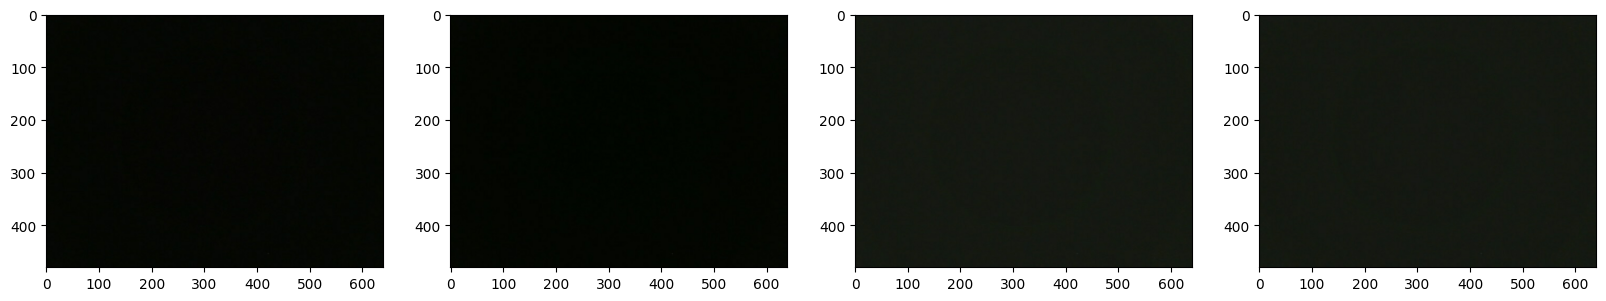

In [18]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

In [14]:
for folder in ['training','testing','validation']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)   

In [15]:
#setting a variable for image to check dimensions of pictures
image = cv2.imread(os.path.join('data', 'training', 'images', '4311f882-6ecf-11ed-a332-00155dc7c39b.jpg')) 

In [16]:
image.shape #checking dimensions of pictures

(480, 640, 3)

In [19]:
import albumentations as album #importing for random augmentations to raw images

In [20]:
#applying random augmentations
augmentor = album.Compose([album.RandomCrop(width=450, height=450), 
                         album.HorizontalFlip(p=0.5), 
                         album.RandomBrightnessContrast(p=0.2),
                         album.RandomGamma(p=0.2), 
                         album.RGBShift(p=0.2), 
                         album.VerticalFlip(p=0.5)], 
                       bbox_params=album.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

In [21]:
img = cv2.imread(os.path.join('data','training', 'images','4311f882-6ecf-11ed-a332-00155dc7c39b.jpg'))

In [22]:
img

array([[[155, 153, 152],
        [156, 154, 153],
        [157, 155, 154],
        ...,
        [ 63,  65,  66],
        [ 62,  64,  64],
        [ 69,  71,  71]],

       [[155, 153, 152],
        [155, 153, 152],
        [156, 154, 153],
        ...,
        [ 70,  72,  73],
        [ 66,  68,  68],
        [ 69,  71,  71]],

       [[154, 152, 151],
        [154, 152, 151],
        [155, 153, 152],
        ...,
        [ 78,  77,  79],
        [ 71,  73,  73],
        [ 70,  72,  72]],

       ...,

       [[143, 144, 140],
        [144, 145, 141],
        [144, 145, 141],
        ...,
        [101, 109, 108],
        [100, 108, 107],
        [ 98, 109, 107]],

       [[143, 144, 142],
        [144, 145, 143],
        [144, 145, 143],
        ...,
        [103, 109, 108],
        [103, 109, 108],
        [102, 110, 109]],

       [[143, 144, 142],
        [145, 146, 144],
        [145, 146, 144],
        ...,
        [101, 107, 106],
        [102, 108, 107],
        [104, 110, 109]]

In [23]:
with open(os.path.join('data', 'training', 'labels', '4311f882-6ecf-11ed-a332-00155dc7c39b.json'), 'r') as f:
    label = json.load(f)

In [24]:
label['shapes'][0]['points'] #fetching data inside the dictionary holding the labels

[[237.17948717948718, 203.07692307692307],
 [377.6923076923077, 393.84615384615387]]

In [25]:
coor = [0,0,0,0]
coor[0] = label['shapes'][0]['points'][0][0]
coor[1] = label['shapes'][0]['points'][0][1]
coor[2] = label['shapes'][0]['points'][1][0]
coor[3] = label['shapes'][0]['points'][1][1]

In [26]:
coor

[237.17948717948718, 203.07692307692307, 377.6923076923077, 393.84615384615387]

In [27]:
coor = list(np.divide(coor, [640,480,640,480]))

In [28]:
coor

[0.37059294871794873,
 0.4230769230769231,
 0.5901442307692307,
 0.8205128205128206]

In [29]:
augmented = augmentor(image=img, bboxes=[coor], class_labels=['face'])

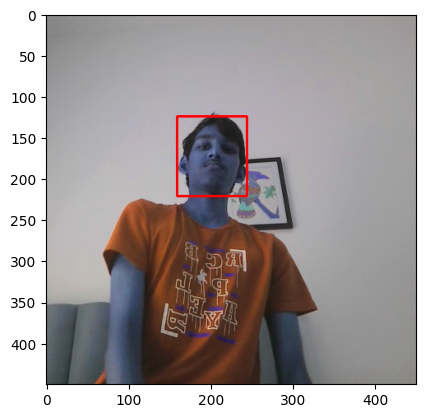

In [33]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

In [32]:
for partition in ['training','testing','validation']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

            try: 
                for x in range(60):
                    augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                    cv2.imwrite(os.path.join('data_augment', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                    annotation = {}
                    annotation['image'] = image

                    if os.path.exists(label_path):
                        if len(augmented['bboxes']) == 0: 
                            annotation['bbox'] = [0,0,0,0]
                            annotation['class'] = 0 
                        else: 
                            annotation['bbox'] = augmented['bboxes'][0]
                            annotation['class'] = 1
                    else: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 


                    with open(os.path.join('data_augment', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                        json.dump(annotation, f)

            except Exception as e:
                print(e)

KeyboardInterrupt: 

In [34]:
training_images = tf.data.Dataset.list_files('data_augment\\training\\images\\*.jpg', shuffle=False)
training_images = training_images.map(load_image)
training_images = training_images.map(lambda x: tf.image.resize(x, (120,120)))
training_images = training_images.map(lambda x: x/255)

In [35]:
testing_images = tf.data.Dataset.list_files('data_augment\\testing\\images\\*.jpg', shuffle=False)
testing_images = testing_images.map(load_image)
testing_images = testing_images.map(lambda x: tf.image.resize(x, (120,120)))
testing_images = testing_images.map(lambda x: x/255)

In [36]:
validation_images = tf.data.Dataset.list_files('data_augment\\validation\\images\\*.jpg', shuffle=False)
validation_images = validation_images.map(load_image)
validation_images = validation_images.map(lambda x: tf.image.resize(x, (120,120)))
validation_images = validation_images.map(lambda x: x/255)

In [37]:
training_images.as_numpy_iterator().next()

array([[[0.46813726, 0.47990197, 0.44460785],
        [0.4655637 , 0.48125   , 0.42585784],
        [0.46470588, 0.48039216, 0.42156863],
        ...,
        [0.54375   , 0.5398284 , 0.5202206 ],
        [0.54540443, 0.5458946 , 0.53658086],
        [0.55355394, 0.55355394, 0.5457108 ]],

       [[0.46746323, 0.47316176, 0.43645832],
        [0.4867647 , 0.49460784, 0.44362745],
        [0.47469363, 0.48253676, 0.43155637],
        ...,
        [0.56427693, 0.56035537, 0.5412378 ],
        [0.56035537, 0.56427693, 0.5441789 ],
        [0.5615809 , 0.56550246, 0.5457108 ]],

       [[0.46519607, 0.4730392 , 0.42990196],
        [0.47892156, 0.4867647 , 0.4357843 ],
        [0.48333332, 0.49117646, 0.44019607],
        ...,
        [0.5577819 , 0.56170344, 0.5420956 ],
        [0.5568628 , 0.56078434, 0.5372549 ],
        [0.56666666, 0.57058823, 0.5495098 ]],

       ...,

       [[0.3329044 , 0.3329044 , 0.3329044 ],
        [0.4759804 , 0.4759804 , 0.4759804 ],
        [0.47990197, 0

In [38]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

In [39]:
training_labels = tf.data.Dataset.list_files('data_augment\\training\\labels\\*.json', shuffle=False)
training_labels = training_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [40]:
testing_labels = tf.data.Dataset.list_files('data_augment\\testing\\labels\\*.json', shuffle=False)
testing_labels = testing_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [41]:
validation_labels = tf.data.Dataset.list_files('data_augment\\validation\\labels\\*.json', shuffle=False)
validation_labels = validation_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [42]:
training = tf.data.Dataset.zip((training_images, training_labels))
training = training.shuffle(5000)
training = training.batch(8)
training = training.prefetch(4)

In [43]:
testing = tf.data.Dataset.zip((testing_images, testing_labels))
testing = testing.shuffle(1300)
testing = testing.batch(8)
testing = testing.prefetch(4)

In [44]:
validation = tf.data.Dataset.zip((validation_images, validation_labels))
validation = validation.shuffle(1000)
validation = validation.batch(8)
validation = validation.prefetch(4)

In [45]:
training.as_numpy_iterator().next()[1]

(array([[1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [1],
        [0]], dtype=uint8),
 array([[0.267 , 0.398 , 0.579 , 0.822 ],
        [0.    , 0.    , 0.    , 0.    ],
        [0.6714, 0.747 , 0.9565, 1.    ],
        [0.    , 0.    , 0.    , 0.    ],
        [0.9053, 0.456 , 1.    , 0.697 ],
        [0.1133, 0.524 , 0.3503, 0.787 ],
        [0.405 , 0.1626, 0.7173, 0.5864],
        [0.    , 0.    , 0.    , 0.    ]], dtype=float16))

In [46]:
data_samples = training.as_numpy_iterator()

In [47]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


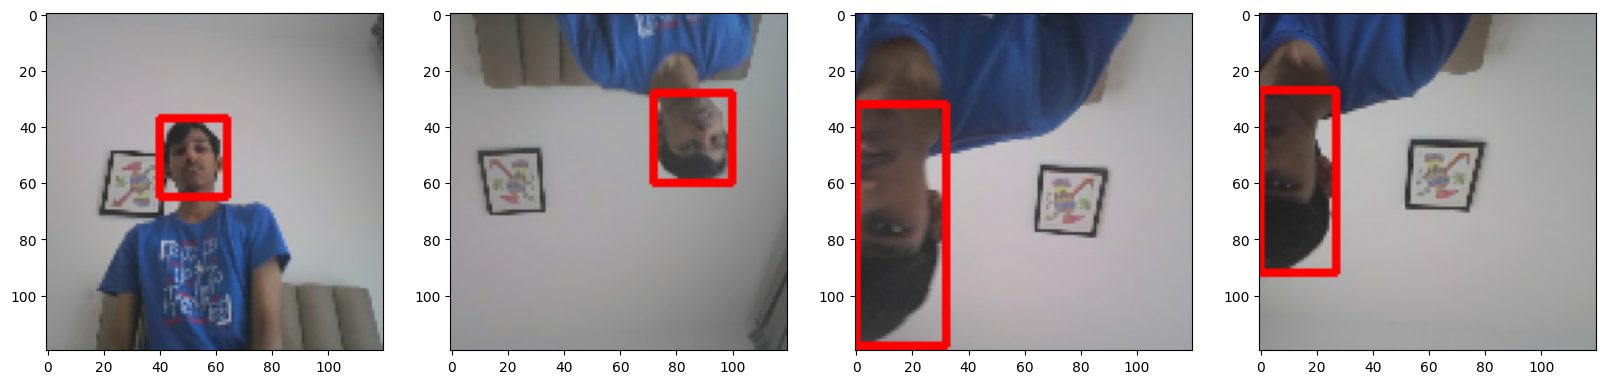

In [48]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

In [79]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import load_model

In [50]:
vgg = VGG16(include_top=False)

In [51]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [52]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    tracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return tracker

In [53]:
tracker = build_model()

In [54]:
tracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_2[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d (GlobalMa  (None, 512)         0           ['vgg16[0][0]']                  
 xPooling2D)                                                                                  

In [55]:
x, y = training.as_numpy_iterator().next()

In [56]:
classes, coor = tracker.predict(x)

1/1 [==============================] - 2s 2s/step


In [57]:
classes, coor

(array([[0.49666095],
        [0.48161578],
        [0.47577232],
        [0.39157945],
        [0.49652874],
        [0.49589694],
        [0.36845565],
        [0.42961198]], dtype=float32),
 array([[0.40944728, 0.32266682, 0.43423235, 0.5995272 ],
        [0.3657367 , 0.3014313 , 0.4115146 , 0.5810527 ],
        [0.45279223, 0.2643372 , 0.41922215, 0.6128846 ],
        [0.39004102, 0.3246963 , 0.47079578, 0.6006016 ],
        [0.37501875, 0.35052347, 0.41527045, 0.620431  ],
        [0.38240448, 0.23487508, 0.44744185, 0.58819354],
        [0.40191227, 0.34435362, 0.42773315, 0.7000446 ],
        [0.4365033 , 0.24982163, 0.46183732, 0.63437206]], dtype=float32))

In [58]:
batches_per_epoch = len(training)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [59]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=lr_decay)

In [60]:
def local_loss(y_true, yunit):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yunit[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yunit[:,3] - yunit[:,1] 
    w_pred = yunit[:,2] - yunit[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [61]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = local_loss

In [62]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [63]:
model = FaceTracker(tracker)

In [64]:
model.compile(opt, classloss, regressloss)

In [65]:
logdir='logs'

In [66]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [67]:
hist = model.fit(training, epochs=10, validation_data=validation, callbacks=[tensorboard_callback])

Epoch 1/10
465/465 [==============================] - 1127s 2s/step - total_loss: 0.3846 - class_loss: 0.0835 - regress_loss: 0.3428 - val_total_loss: 0.0115 - val_class_loss: 8.1082e-05 - val_regress_loss: 0.0115
Epoch 2/10
465/465 [==============================] - 1049s 2s/step - total_loss: 0.1043 - class_loss: 0.0300 - regress_loss: 0.0893 - val_total_loss: 0.0103 - val_class_loss: 1.8925e-06 - val_regress_loss: 0.0103
Epoch 3/10
465/465 [==============================] - 1151s 2s/step - total_loss: 0.0776 - class_loss: 0.0231 - regress_loss: 0.0660 - val_total_loss: 0.0073 - val_class_loss: 9.9917e-04 - val_regress_loss: 0.0068
Epoch 4/10
465/465 [==============================] - 1206s 3s/step - total_loss: 0.0518 - class_loss: 0.0144 - regress_loss: 0.0446 - val_total_loss: 0.0066 - val_class_loss: 5.8580e-05 - val_regress_loss: 0.0066
Epoch 5/10
465/465 [==============================] - 1444s 3s/step - total_loss: 0.0369 - class_loss: 0.0122 - regress_loss: 0.0308 - val_total

In [68]:
hist.history

{'total_loss': [0.04765288159251213,
  0.03883974254131317,
  0.050699152052402496,
  0.023655716329813004,
  0.008706419728696346,
  0.005862473044544458,
  0.8481977581977844,
  0.0032672430388629436,
  0.0043637678027153015,
  0.0014808300184085965],
 'class_loss': [0.00025397271383553743,
  0.002238647313788533,
  0.01325858011841774,
  7.572682079626247e-05,
  4.778370930580422e-05,
  2.4930421204771847e-05,
  0.21168334782123566,
  5.1189257646910846e-05,
  0.0008639669977128506,
  2.5891897166729905e-05],
 'regress_loss': [0.04752589389681816,
  0.037720419466495514,
  0.04406986013054848,
  0.023617852479219437,
  0.00868252757936716,
  0.0058500077575445175,
  0.7423560619354248,
  0.003241648431867361,
  0.00393178453668952,
  0.0014678840525448322],
 'val_total_loss': [0.011547086760401726,
  0.010291790589690208,
  0.007308213505893946,
  0.006581421941518784,
  0.0025733476504683495,
  0.014929769560694695,
  0.010374756529927254,
  0.007282386999577284,
  0.00319816032424

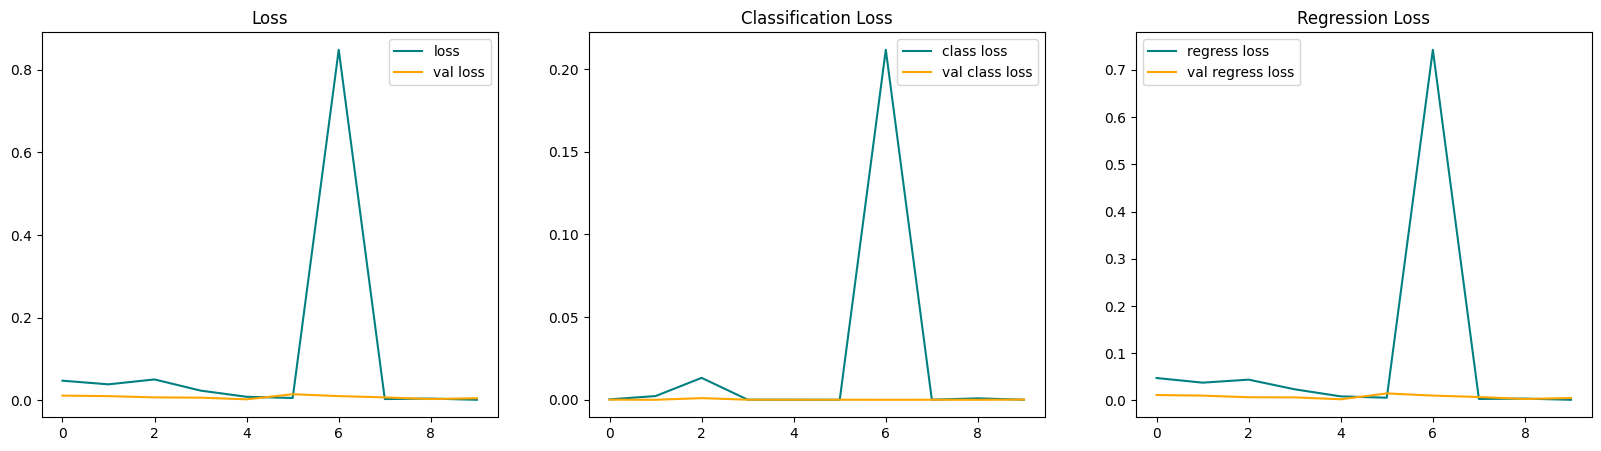

In [69]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

In [71]:
testing_data = testing.as_numpy_iterator()

In [72]:
testing_sample = testing_data.next()

In [74]:
yunit = tracker.predict(testing_sample[0])

1/1 [==============================] - 1s 728ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


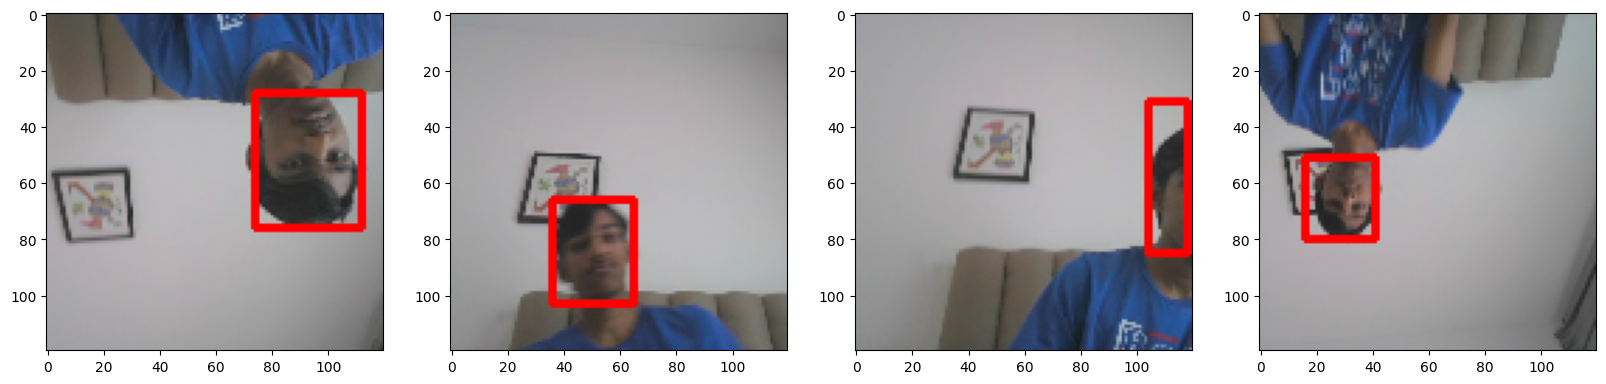

In [78]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = testing_sample[0][idx]
    sample_coords = yunit[1][idx]
    
    if yunit[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

In [84]:
tracker.save('tracker.h5')

In [85]:
tracker = load_model('tracker.h5')

In [89]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yunit = tracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yunit[1][0]
    
    if yunit[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 173ms/step
